# Principal Component Analysis (PCA) with Scikit-learn

Curse of dimensionality: 
- less interpretability
- higher complexity

PCA is a linear dimensionality reduction technique that transforms the p number of input variables into a smaller k (k << p) number of uncorrelated variables called principal components by taking advantage of the existing correlations between the input variables in the dataset. 

PCA takes advantage of existing correlations between the input variables in the dataset and combines those correlated variables into a new set of uncorrelated variables.

PCA is an unsupervised machine learning algorithm as it does not require labels in the data.

## Feature scaling in PCA

### Numerical data

PCA is a statistical technique and can only be applied to numeric data. Therefore, categorical features are required to be converted into numerical features before PCA can be applied.

### Standardize data into the same scale

PCA is sensitive to data with different scales, as covariance matrix requires the data at the same scale to measure the correlation between features with a consistent standard. To achieve that, data standardization is applied before PCA, which means that each feature has a mean of zero and a standard deviation of one. 

## Example with IRIS dataset

### Dataset Loading

In [1]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing 

The first preprocessing step is to divide the dataset into a feature set and corresponding labels. The following script performs this task:

In [2]:
X = dataset.drop('Class', axis=1)
Y = dataset['Class']

The next preprocessing step is to divide data into training and test sets. 

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

As mentioned earlier, PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA on the scaled data

PCA depends only upon the feature set and not the label data. Therefore, PCA can be considered as an unsupervised machine learning technique.

Performing PCA using Scikit-Learn is a two-step process:

- Initialize the PCA class by passing the number of components to the constructor.

- Call the fit and then transform methods by passing the feature set to these methods. The transform method returns the specified number of principal components.

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

We did not specify the number of components in the constructor. Hence, all four of the features in the feature set will be returned for both the training and test sets.

The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.

In [6]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.72226528 0.23974795 0.03338117 0.0046056 ]


### Visualize explained variance using scree plot

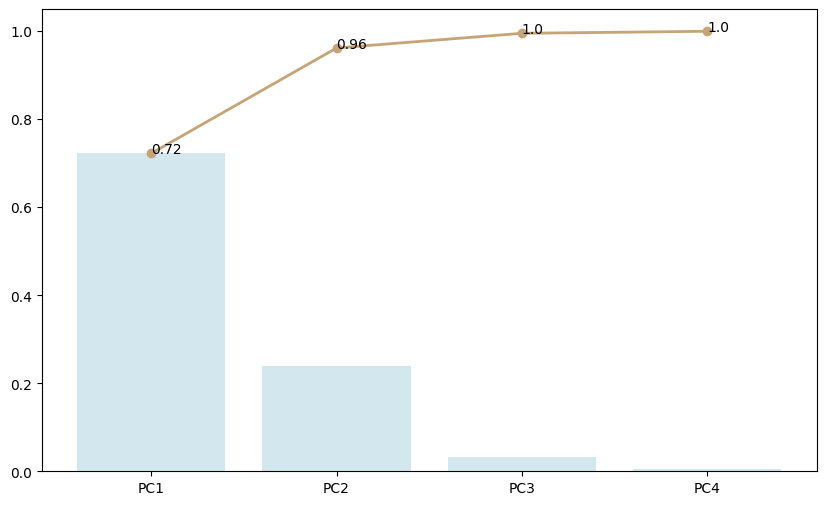

In [7]:
import matplotlib.pyplot as plt

principal_components = ['PC1', 'PC2', 'PC3', 'PC4']
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(principal_components, explained_variance, color='#D3E7EE')
plt.plot(principal_components, cumulative_variance, 'o-', linewidth=2, color='#C6A477')

# add cumulative variance as the annotation
for i,j in zip(principal_components, cumulative_variance):
   plt.annotate(str(round(j,2)), xy=(i, j))

It can be seen that first principal component is responsible for 72.22% variance. Similarly, the second principal component causes 23.9% variance in the dataset. Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained in the feature set is captured by the first two principal components.

Let's first try to use 1 principal component to train our algorithm. 

In [8]:
from sklearn.decomposition import PCA

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Training and Making Predictions

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

### Performance Evaluation

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy:  0.9333333333333333


It can be seen from the output that with only one feature, the random forest algorithm is able to correctly predict 28 out of 30 instances, resulting in 93.3% accuracy.